In [103]:
from sleep_analysis_library.utils import connect
import pandas as pd
from IPython.display import display
from pandas_profiling import ProfileReport
import matplotlib as plt
from sklearn.cluster import KMeans

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [12]:
AMPLITUDE = """SELECT [UserId]
      ,[EventDate]
      ,[AppVersion]
      ,AVG([AppOpen]) AS AppOpen_avg
      ,AVG([GoToSleepScreen]) AS GoToSleepScreen_avg
      ,AVG([TrackingStart]) AS TrackingStart_avg
      ,AVG([SessionStart]) AS SessionStart_avg
      ,AVG([TrackingSessionStop]) AS TrackingSessionStop_avg
      ,AVG([HistoryScreen]) AS HistoryScreen_avg
      ,AVG([SleepDetailsScreen]) AS SleepDetailsScreen_avg
      ,AVG([TrackingStop]) AS TrackingStop_avg
      ,AVG([TrackingScreen]) AS TrackingScreen_avg
      ,AVG([SleepSummaryScreen]) AS SleepSummaryScreen_avg
      ,AVG([GoToSleepTrack]) AS GoToSleepTrack_avg
      ,AVG([TrackingSessionStart]) AS TrackingSessionStart_avg
      ,AVG([BedtimeNotificationDelievered]) AS BedtimeNotificationDelievered_avg
      ,AVG([SiriNugget]) AS SiriNugget_avg
      ,AVG([SleepGuideViewController]) AS SleepGuideViewController_avg
      ,AVG([HistoryNightsTap]) AS HistoryNightsTap_avg
      ,AVG([SetAlarmScreen]) AS SetAlarmScreen_avg
      ,AVG([PreSleepScreen]) AS PreSleepScreen_avg
      ,AVG([SolutionsScreen]) AS SolutionsScreen_avg
      ,AVG([ProfileScreen]) AS ProfileScreen_avg
      ,AVG([HistoryNightsPrevious]) AS HistoryNightsPrevious_avg
      ,AVG([WindingDownPlay]) AS WindingDownPlay_avg
      ,AVG([PlugInPhoneModal]) AS PlugInPhoneModal_avg
      ,AVG([BedtimeScreen]) AS BedtimeScreen_avg
      ,AVG([FirstOpen]) AS FirstOpen_avg
      ,AVG([AppClose]) AS AppClose_avg
      ,AVG([BreathingRateScreen]) AS BreathingRateScreen_avg
      ,AVG([History_BreathingRateTap]) AS History_BreathingRateTap_avg
      ,AVG([SanctuaryScreen]) AS SanctuaryScreen_avg
      ,AVG([TipsScreen]) AS TipsScreen_avg
      ,AVG([SmartAlarm_On]) AS SmartAlarm_On_avg
      ,AVG([Solutions_Tools_ProductFinder_Try]) AS Solutions_Tools_ProductFinder_Try_avg
      ,AVG([Solutions_Tools_SleepScreener]) AS Solutions_Tools_SleepScreener_avg
      ,AVG([PreSleep_Set]) AS PreSleep_Set_avg
      ,AVG([Polls_Answer]) AS Polls_Answer_avg
  FROM [dbo].[AmplitudeUserEvents]
  GROUP BY UserId, EventDate, AppVersion
  ORDER BY UserId, EventDate, AppVersion"""


In [13]:
%%time
dl = connect.DataLake(local_settings_file='dl.settings.json')
amplitude_df = dl.query_to_df(AMPLITUDE)

CPU times: user 1min 27s, sys: 3.57 s, total: 1min 31s
Wall time: 6min 35s


In [14]:
amplitude_df.shape

(3677910, 38)

In [77]:
amplitude_df.loc[:,'diff_day'] = amplitude_df.groupby(by = 'UserId').EventDate.transform('max') - amplitude_df.groupby(by = 'UserId').EventDate.transform('min')

In [197]:
sample = amplitude_df.head(10000)

In [209]:
amplitude_df.loc[:, 'event_date_yymm'] = amplitude_df['EventDate'].dt.strftime('%Y-%m')
amplitude_df.loc[:, 'diff_day'] = amplitude_df['diff_day'].astype('timedelta64[D]')

In [210]:
monthly_diff = amplitude_df.groupby(by = 'event_date_yymm')['diff_day'].mean().reset_index(name ='avg_diff_days').sort_values(by='event_date_yymm')

In [79]:
amplitude_df.tail()

UserId  EventDate AppVersion  \
3677905  FFFFD1E1-97A2-432A-8CB5-C58E5CC84B64 2019-10-31     2.24.0   
3677906  FFFFD1E1-97A2-432A-8CB5-C58E5CC84B64 2019-11-01     2.24.1   
3677907  FFFFD1E1-97A2-432A-8CB5-C58E5CC84B64 2019-11-02     2.24.1   
3677908  FFFFD1E1-97A2-432A-8CB5-C58E5CC84B64 2019-11-04     2.24.1   
3677909  FFFFD1E1-97A2-432A-8CB5-C58E5CC84B64 2019-11-12       2.25   

         AppOpen_avg  GoToSleepScreen_avg TrackingStart_avg SessionStart_avg  \
3677905          3.0                  1.0              None             None   
3677906          7.0                  1.0              None             None   
3677907          4.0                  2.0              None             None   
3677908          4.0                  3.0              None             None   
3677909          4.0                  2.0              None             None   

         TrackingSessionStop_avg  HistoryScreen_avg  SleepDetailsScreen_avg  \
3677905                      1.0                1.0                     1.0   
3677906                      1.0                NaN                     1.0   
3677907                      1.0                2.0                     2.0   
3677908                      4.0                1.0                     1.0   
3677909                      1.0                NaN                     1.0   

        TrackingStop_avg  TrackingScreen_avg  SleepSummaryScreen_avg  \
3677905             None                 1.0                     1.0   
3677906             None                 1.0                     1.0   
3677907             None                 1.0                     1.0   
3677908             None                 2.0                     1.0   
3677909             None                 1.0                     1.0   

        GoToSleepTrack_avg  TrackingSessionStart_avg  \
3677905               None                       1.0   
3677906               None                       1.0   
3677907               None                       1.0   
3677908               None                       2.0   
3677909               None                       1.0   

        BedtimeNotificationDelievered_avg  SiriNugget_avg  \
3677905                              None             2.0   
3677906                              None             1.0   
3677907                              None             2.0   
3677908                              None             NaN   
3677909                              None             NaN   

         SleepGuideViewController_avg HistoryNightsTap_avg  \
3677905                           NaN                 None   
3677906                           NaN                 None   
3677907                           NaN                 None   
3677908                           NaN                 None   
3677909                           NaN                 None   

         SetAlarmScreen_avg  PreSleepScreen_avg  SolutionsScreen_avg  \
3677905                 NaN                 1.0                  NaN   
3677906                 NaN                 NaN                  NaN   
3677907                 1.0                 1.0                  NaN   
3677908                 1.0                 NaN                  NaN   
3677909                 1.0                 NaN                  NaN   

         ProfileScreen_avg HistoryNightsPrevious_avg  WindingDownPlay_avg  \
3677905                NaN                      None                  NaN   
3677906                NaN                      None                  NaN   
3677907                NaN                      None                  NaN   
3677908                NaN                      None                  NaN   
3677909                NaN                      None                  NaN   

         PlugInPhoneModal_avg  BedtimeScreen_avg FirstOpen_avg  AppClose_avg  \
3677905                   NaN                NaN          None           3.0   
3677906                   NaN                NaN          None           6.0   
3677907   

In [81]:
amp_diff = amplitude_df[['UserId', 'diff_day']].drop_duplicates()

In [96]:
amp_diff.loc[:,'diff_day'] = amp_diff['diff_day'].astype('timedelta64[D]')

In [97]:
amp_diff.describe()

diff_day
count  234842.000000
mean       85.115912
std       176.404135
min         0.000000
25%         0.000000
50%         4.000000
75%        70.000000
max       952.000000

In [100]:
amp_diff.dtypes

UserId       object
diff_day    float64
dtype: object

(0.0, 0.0176)

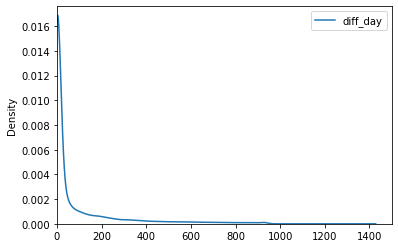

In [110]:
ax = amp_diff.plot.kde()
ax.set_xlim([0, 1500])
ax.set_ylim([0,0.0176])

<AxesSubplot:>

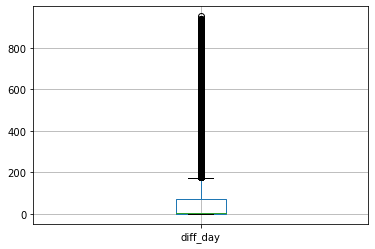

In [111]:
amp_diff.boxplot('diff_day')

![](./ChurnLogic.png)

In [141]:
thresh = 7
print('Total users ' + str(amp_diff.shape[0]) + \
      ', above threshold ' + str(amp_diff[amp_diff["diff_day"] > thresh].shape[0]) + \
      ', percent = ' + str('{0:.2f}'.format(amp_diff[amp_diff["diff_day"] > thresh].shape[0]*100/amp_diff.shape[0])))

Total users 234842, above threshold 104398, percent = 44.45


In [140]:
pd.options.display.max_rows = 10
amp_diff[amp_diff["diff_day"] > 7]

UserId  diff_day
2        00007F30-1A82-491D-BE54-16C90FBBE764      73.0
53       0000FB6B-54E8-400F-AC09-A154979F0E13     297.0
60       00023E16-7141-4646-823E-732EB77DD35F     519.0
64       0002509A-F9DC-400F-8006-590C1D091916      61.0
83       000302B8-F9BF-4892-B83A-863B389CEE8D     127.0
...                                       ...       ...
3677819  FFFD52D0-89C9-41DE-B73B-30D74D7E757B      51.0
3677870  FFFD6EF2-665E-4DAB-AF69-B37381A5009E       9.0
3677878  FFFDA8A5-B22F-4EC6-9FB6-F713E105BB76      38.0
3677884  FFFE9E01-D9B7-40C3-99F1-850E0CCD43A4     341.0
3677897  FFFFD1E1-97A2-432A-8CB5-C58E5CC84B64      23.0

[104398 rows x 2 columns]

In [145]:
kmeans = KMeans(n_clusters=3).fit(amp_diff['diff_day'].values.reshape(-1, 1))

In [147]:
kmeans.cluster_centers_

array([[ 16.14236281],
       [268.7476613 ],
       [681.79157895]])

In [149]:
kmeans.inertia_

676701005.1069154

In [152]:
amp_diff.sort_values(by = 'diff_day', ascending=False)

UserId  diff_day
3272856  E4227B2F-97F5-4468-8BA9-E5ED2711A7FE     952.0
2446483  AC0EEDBF-28CC-4F92-BDDC-FCD2F7391485     940.0
1911390  862A3F20-B8BB-4585-A60F-2AFD9654BCC2     939.0
2547164  B26EBA0D-A916-4AFB-B989-0BCA86FB0A83     937.0
3313268  E70BF9C1-D2C5-4302-AD6F-5615D64BAA62     936.0
...                                       ...       ...
2748166  C0686375-43A3-4321-91BA-AA719397F5D1       0.0
1454592  65BCBF5F-A816-4C1A-9FE7-AFF0135445F7       0.0
1454593  65BD1523-4713-48CE-BFBC-D14378CC1233       0.0
1454594  65BE1ABC-2D1E-4F17-932C-33A8A2EB7045       0.0
1828782  8012CE94-4E6A-4EC6-BF78-459ABB969F5C       0.0

[234842 rows x 2 columns]

<AxesSubplot:xlabel='event_date_yymm'>

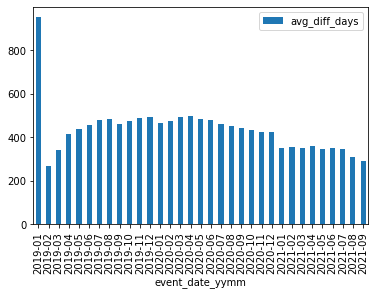

In [211]:
monthly_diff.plot.bar(x='event_date_yymm', y = 'avg_diff_days')